In [22]:
# Pandas library for the pandas dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt

# Import statistic model library
import statsmodels.api as sm

In [2]:
# Loads the Augmented Dataset with no None Values
data = pd.read_csv('augmented_data.csv')
data

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.000000
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.000000
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.000000
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.000000
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,229,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,1.70,450.0,537.714286
230,230,230,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,2.50,530.0,569.785714
231,231,231,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.50,585.0,589.714286
232,232,232,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.70,590.0,589.714286


We will be looking at Multilinear Regression and its capabilities in predicting one of the outputs individually. 

In [3]:
# Defines the input and output for the 3 models
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihtdrate', 
             'x0_cadmium acetate dihydrate', 'x0_cadmium oxide', 
             'x0_cadmium stearate', 'x0_dimethylcadmium', 'x1_None', 
             'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide']

output_col_d = ['Diameter_nm']
output_col_ab = ['Absorbance max (nm)']
output_col_pl = ['PL max (nm)']

X_total = data[input_col]
Y_total_d = data[output_col_d]
Y_total_ab = data[output_col_ab]
Y_total_pl = data[output_col_pl]

In [4]:
# Defines 3 training and testing data sets by taking 20% of the original sample as the testing data set
X_train, X_test, y_train_d, y_test_d = train_test_split(X_total, Y_total_d, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train_ab, y_test_ab = train_test_split(X_total, Y_total_ab, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train_pl, y_test_pl = train_test_split(X_total, Y_total_pl, test_size=0.2, random_state=42, shuffle=True)

In [5]:
# Creates the 3 linear regression objects for each model
reg_d = linear_model.LinearRegression()
reg_ab = linear_model.LinearRegression()
reg_pl = linear_model.LinearRegression()

# Use each model to fit the training data
reg_d.fit(X_train, y_train_d)
reg_ab.fit(X_train, y_train_ab)
reg_pl.fit(X_train, y_train_pl)

# Use each model to predict the output for the testing dataset
y_predict_d = reg_d.predict(X_test)
y_predict_ab = reg_ab.predict(X_test)
y_predict_pl = reg_pl.predict(X_test)

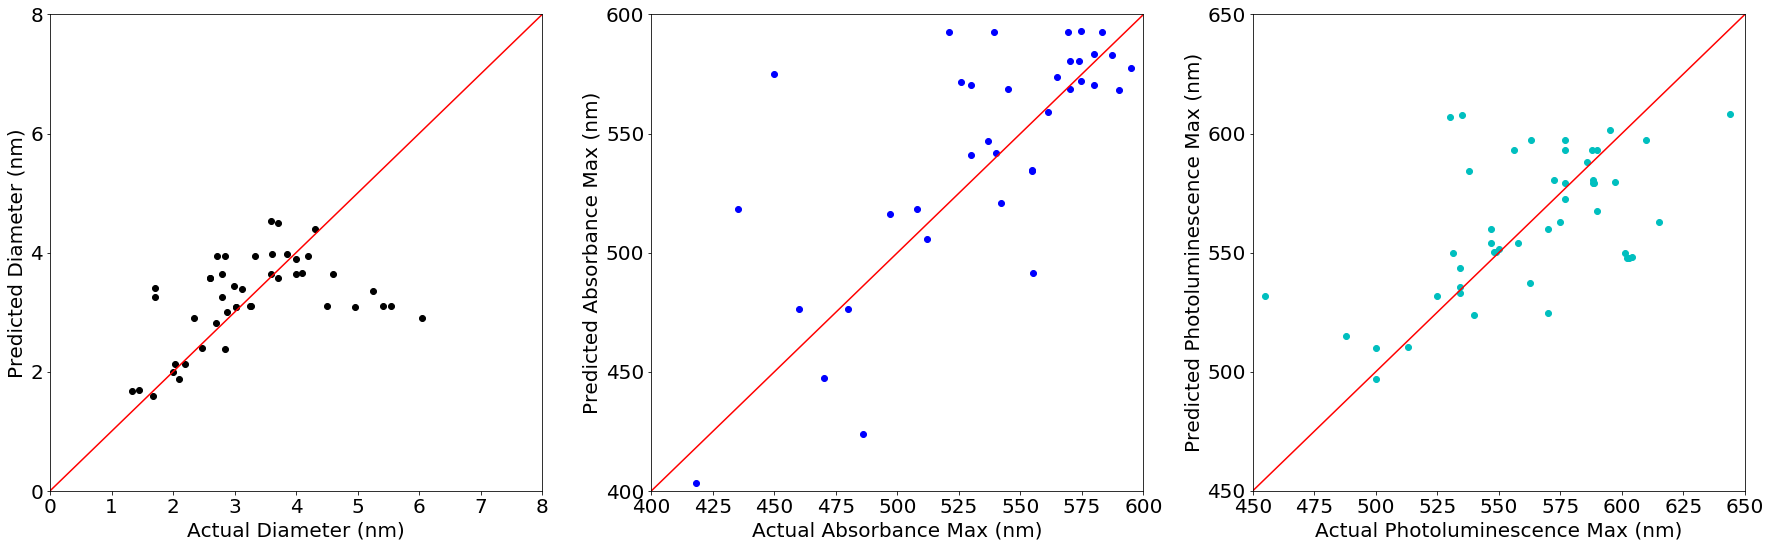

In [6]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)

axes[0].scatter(y_test_d, y_predict_d, color='k')
axes[0].plot([0, 1],[0, 1], transform=axes[0].transAxes, color = 'r')
axes[0].set_xlim(0,8)
axes[0].set_ylim(0,8)
axes[0].set_yticks([0, 2, 4, 6, 8])
axes[0].set_xlabel('Actual Diameter (nm)')
axes[0].set_ylabel('Predicted Diameter (nm)')

axes[1].scatter(y_test_ab, y_predict_ab, color='b')
axes[1].plot([0, 1],[0, 1], transform=axes[1].transAxes, color = 'r')
axes[1].set_xlim(400,600)
axes[1].set_ylim(400,600)
axes[1].set_yticks([400, 450, 500, 550, 600])
axes[1].set_xlabel('Actual Absorbance Max (nm)')
axes[1].set_ylabel('Predicted Absorbance Max (nm)')

axes[2].scatter(y_test_pl, y_predict_pl, color='c')
axes[2].plot([0,1],[0,1], transform=axes[2].transAxes, color = 'r')
axes[2].set_xlim(450, 650)
axes[2].set_ylim(450, 650)
axes[2].set_yticks([450, 500, 550, 600, 650])
axes[2].set_xlabel('Actual Photoluminescence Max (nm)')
axes[2].set_ylabel('Predicted Photoluminescence Max (nm)')

plt.tight_layout()

### Analysis on these qualitative plots 

In [7]:
# Calculate the mean squared error 
print('MSE for diameter prediction:', round(mean_squared_error(y_test_d, y_predict_d), 2))
print('MSE squared error for absorbance max prediction:', round(mean_squared_error(y_test_ab, y_predict_ab), 2))
print('MSE squared error for PL max prediction:', round(mean_squared_error(y_test_pl, y_predict_pl), 2))

print('\n')

# Calculate the R^2 value 
print('R squared for diameter prediction:', round(r2_score(y_test_d, y_predict_d), 2))
print('R squared error for absorbance max prediction:', round(r2_score(y_test_ab, y_predict_ab), 2))
print('R squared error for PL max prediction:', round(r2_score(y_test_pl, y_predict_pl), 2))

MSE for diameter prediction: 1.99
MSE squared error for absorbance max prediction: 2379.66
MSE squared error for PL max prediction: 944.17


R squared for diameter prediction: 0.18
R squared error for absorbance max prediction: 0.44
R squared error for PL max prediction: 0.29


### Analysis for the MSE and R^2 values

### F-statistic Analysis

Here, we use the F-statistic to see the validity of our hypothesis that our output depends on at least one of the input features. Intuitively, we know that this should be true because the CdSe dots were synthesized as a result of the experimental inputs which we used as our input data. So at least we know that it depends on at least one of the input variables, which confirms the validity of the aforementioned hypothesis. 

Below, let us calculate the F-statistic for the 3 different models.

In [8]:
mreg_1 = sm.OLS(y_train_d, X_train).fit()
mreg_1.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Diameter_nm   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     2.596
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.87e-05
Time:                        15:19:32   Log-Likelihood:                -250.70
No. Observations:                 187   AIC:                             583.4
Df Residuals:                     146   BIC:                             715.9
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------------------------------------------------
Growth Temp (Celsius)              0.5493      0.376      1.459      0.147      -0.074       1.172
Metal_mmol (mmol)                  0.4387      1.083      0.405      0.686      -1.355       2.232
Chalcogen_mmol (mmol)             -0.9650      0.909     -1.062      0.290      -2.470       0.540
Amines_mmol (mmol)                -0.2252      0.242     -0.929      0.354      -0.626       0.176
CA_mmol (mmol)                    -0.2492      0.648     -0.385      0.701      -1.322       0.823
Phosphines_mmol (mmol)             0.3105      0.696      0.446      0.656      -0.842       1.463
S_I_amount (g)                     0.0969      0.369      0.263      0.793      -0.513       0.707
S_II_amount (g)                   -0.0396      0.109     -0.364      0.716      -0.219       0.140
Time_min (min)                     0.0368      0.134      0.275      0.784      -0.185       0.258
x0_cadmium acetate                 0.6866      1.121      0.612      0.541      -1.169       2.542
x0_cadmium acetate dihtdrate       0.1379      1.673      0.082      0.934      -2.632       2.908
x0_cadmium acetate dihydrate       0.7946      1.207      0.658      0.511      -1.203       2.793
x0_cadmium oxide                   0.3214      0.934      0.344      0.731      -1.225       1.868
x0_cadmium stearate                0.2522      1.284      0.196      0.845      -1.873       2.377
x0_dimethylcadmium                 1.5163      1.522      0.996      0.321      -1.003       4.036
x1_None                            0.3375      1.448      0.233      0.816      -2.059       2.734
x1_benzoic acid                   -0.2782      3.485     -0.080      0.936      -6.047       5.490
x1_dodecylphosphonic acid          0.5290      5.271      0.100      0.920      -8.197       9.255
x1_ethylphosphonic acid            0.7625      1.231      0.620      0.536      -1.274       2.799
x1_lauric acid                     0.6767      1.229      0.551      0.583      -1.358       2.711
x1_myrstic acid                    0.4353      0.868      0.502      0.617      -1.001       1.872
x1_oleic acid                      0.8350      0.763      1.095      0.275      -0.428       2.098
x1_stearic acid                    0.4113      1.058      0.389      0.698      -1.340       2.163
x2_2-6-dimethylpyridine        -4.309e-15   5.42e-15     -0.796      0.428   -1.33e-14    4.66e-15
x2_None                           -0.0193      0.727     -0.027      0.979      -1.223       1.184
x2_aniline                      1.133e-14   2.09e-14      0.542      0.588   -2.33e-14    4.59e-14
x2_benzylamine                    -0.1821      1.265     -0.144      0.886      -2.276       1.911
x2_dioctylamine/hexadecylamine     2.7797      3.715      0.748      0.456      -3.370       8.930
x2_dodecylamin

In [9]:
mreg_2 = sm.OLS(y_train_ab, X_train).fit()
mreg_2.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Absorbance max (nm)   R-squared:                       0.641
Model:                             OLS   Adj. R-squared:                  0.543
Method:                  Least Squares   F-statistic:                     6.526
Date:                 Sun, 07 Mar 2021   Prob (F-statistic):           1.80e-17
Time:                         15:19:33   Log-Likelihood:                -951.03
No. Observations:                  187   AIC:                             1984.
Df Residuals:                      146   BIC:                             2117.
Df Model:                           40                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------------------------------------------------
Growth Temp (Celsius)             62.2746     15.930      3.909      0.000      35.905      88.644
Metal_mmol (mmol)                 68.3948     45.845      1.492      0.138      -7.494     144.284
Chalcogen_mmol (mmol)            -16.0918     38.458     -0.418      0.676     -79.754      47.570
Amines_mmol (mmol)                 3.7300     10.253      0.364      0.717     -13.242      20.702
CA_mmol (mmol)                   -12.0291     27.413     -0.439      0.661     -57.407      33.349
Phosphines_mmol (mmol)           -45.8151     29.452     -1.556      0.122     -94.568       2.938
S_I_amount (g)                   -10.0020     15.598     -0.641      0.522     -35.822      15.818
S_II_amount (g)                    1.0864      4.596      0.236      0.813      -6.522       8.694
Time_min (min)                     3.1405      5.663      0.555      0.580      -6.234      12.515
x0_cadmium acetate                81.7351     47.435      1.723      0.087       3.214     160.256
x0_cadmium acetate dihtdrate      52.4115     70.796      0.740      0.460     -64.781     169.604
x0_cadmium acetate dihydrate     129.4090     51.070      2.534      0.012      44.870     213.948
x0_cadmium oxide                  92.5458     39.536      2.341      0.021      27.100     157.992
x0_cadmium stearate               57.1774     54.321      1.053      0.294     -32.744     147.099
x0_dimethylcadmium                20.0352     64.408      0.311      0.756     -86.583     126.653
x1_None                           86.9403     61.256      1.419      0.158     -14.460     188.341
x1_benzoic acid                   45.0078    147.450      0.305      0.761    -199.074     289.090
x1_dodecylphosphonic acid        -49.2109    223.034     -0.221      0.826    -418.411     319.989
x1_ethylphosphonic acid           90.0412     52.066      1.729      0.086       3.853     176.229
x1_lauric acid                   100.7628     51.999      1.938      0.055      14.685     186.840
x1_myrstic acid                   21.6434     36.719      0.589      0.556     -39.140      82.426
x1_oleic acid                     92.4715     32.277      2.865      0.005      39.042     145.901
x1_stearic acid                   45.6580     44.775      1.020      0.310     -28.460     119.776
x2_2-6-dimethylpyridine        -1.347e-13   2.29e-13     -0.588      0.558   -5.14e-13    2.45e-13
x2_None                           62.0814     30.760      2.018      0.045      11.162     113.001
x2_aniline                      3.094e-13   8.84e-13      0.350      0.727   -1.15e-12    1.77e-12
x2_benzylamine                    31.0474     53.514      0.580      0.563     -57.538     119.633
x2_dioctylamine/hexadecylamine    30.2666    157.195      0.193      0.848    -229.947     290.480
x2_

In [10]:
mreg_3 = sm.OLS(y_train_pl, X_train).fit()
mreg_3.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PL max (nm)   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     5.006
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.57e-13
Time:                        15:19:33   Log-Likelihood:                -878.45
No. Observations:                 187   AIC:                             1839.
Df Residuals:                     146   BIC:                             1971.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------------------------------------------------
Growth Temp (Celsius)             28.9045     10.805      2.675      0.008      11.018      46.791
Metal_mmol (mmol)                 47.4947     31.097      1.527      0.129      -3.982      98.971
Chalcogen_mmol (mmol)            -15.0374     26.087     -0.576      0.565     -58.220      28.145
Amines_mmol (mmol)                 4.4375      6.955      0.638      0.524      -7.075      15.950
CA_mmol (mmol)                   -26.5992     18.595     -1.430      0.155     -57.380       4.181
Phosphines_mmol (mmol)           -48.6271     19.977     -2.434      0.016     -81.697     -15.558
S_I_amount (g)                    -0.9101     10.580     -0.086      0.932     -18.424      16.604
S_II_amount (g)                    0.8458      3.118      0.271      0.787      -4.315       6.006
Time_min (min)                     3.6753      3.841      0.957      0.340      -2.683      10.034
x0_cadmium acetate               106.5837     32.175      3.313      0.001      53.322     159.846
x0_cadmium acetate dihtdrate      20.4422     48.022      0.426      0.671     -59.051      99.935
x0_cadmium acetate dihydrate     144.8869     34.641      4.182      0.000      87.543     202.231
x0_cadmium oxide                 121.0895     26.818      4.515      0.000      76.697     165.482
x0_cadmium stearate               58.6944     36.847      1.593      0.113      -2.300     119.689
x0_dimethylcadmium                51.3204     43.689      1.175      0.242     -21.000     123.641
x1_None                           78.2323     41.551      1.883      0.062       9.451     147.014
x1_benzoic acid                  -23.2460    100.017     -0.232      0.817    -188.810     142.318
x1_dodecylphosphonic acid        101.4910    151.286      0.671      0.503    -148.942     351.924
x1_ethylphosphonic acid           91.2577     35.317      2.584      0.011      32.795     149.720
x1_lauric acid                   137.6419     35.272      3.902      0.000      79.254     196.029
x1_myrstic acid                    9.7659     24.907      0.392      0.696     -31.464      50.996
x1_oleic acid                     71.2653     21.894      3.255      0.001      35.024     107.507
x1_stearic acid                   36.6090     30.371      1.205      0.230     -13.666      86.884
x2_2-6-dimethylpyridine        -2.704e-13   1.55e-13     -1.739      0.084   -5.28e-13   -1.31e-14
x2_None                           54.2888     20.865      2.602      0.010      19.750      88.828
x2_aniline                      7.456e-13      6e-13      1.243      0.216   -2.47e-13    1.74e-12
x2_benzylamine                     3.4935     36.299      0.096      0.923     -56.595      63.582
x2_dioctylamine/hexadecylamine    97.9067    106.627      0.918      0.360     -78.599     274.412
x2_dodecylamin

### Backward Stepwise Selection

In [11]:
# Backward Feature selector for Diameter Prediction
sfs_backward_d = SequentialFeatureSelector(linear_model.LinearRegression(),
                                        n_features_to_select=5,
                                        direction='backward').fit(X_total, Y_total_d)

selected = sfs_backward_d.get_support(indices=True)
print("Selected 5 input features using Backward Stepwise Selection for diameter prediction: \n", np.array(input_col)[selected])

Selected 5 input features using Backward Stepwise Selection for diameter prediction: 
 ['Growth Temp (Celsius)' 'Metal_mmol (mmol)' 'CA_mmol (mmol)'
 'x1_oleic acid' 'x3_triphenylphosphine']


In [12]:
# Backward Feature selector for Absorbance Max Prediction
sfs_backward_ab = SequentialFeatureSelector(linear_model.LinearRegression(),
                                        n_features_to_select=5,
                                        direction='backward').fit(X_total, Y_total_ab)

selected = sfs_backward_ab.get_support(indices=True)
print("Selected 5 input features using Backward Stepwise Selection for absorbance max prediction: \n", np.array(input_col)[selected])

Selected 5 input features using Backward Stepwise Selection for absorbance max prediction: 
 ['Growth Temp (Celsius)' 'x1_oleic acid' 'x2_hexadecylamine'
 'x3_trioctylphosphine' 'x4_octadecene']


In [13]:
# Backward Feature selector for Photoluminescence Max Prediction
sfs_backward_pl = SequentialFeatureSelector(linear_model.LinearRegression(),
                                        n_features_to_select=5,
                                        direction='backward').fit(X_total, Y_total_pl)

selected = sfs_backward_pl.get_support(indices=True)
print("Selected 5 input features using Backward Stepwise Selection for photoluminescence prediction: \n", np.array(input_col)[selected])

Selected 5 input features using Backward Stepwise Selection for photoluminescence prediction: 
 ['Growth Temp (Celsius)' 'Phosphines_mmol (mmol)' 'x2_hexadecylamine'
 'x3_tributylphosphine' 'x4_octadecene']


### Residual Plot Comparison

The point of this analysis is to get a sense of whether the response-predictor relationship is linear. To do so, we will look at a plot of the residual error vs the y_test for each model.

The first thing we have to do is create a polynomial fit for each model and compare the residual error vs y_test_(output feature) relationship of each model. 

In [14]:
# Degree of polynomial model
degree = 3

# Fitting and Predicting using a polynomial model of degree 5 for diameter of dots
model_d = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model_d.fit(X_train, y_train_d)
y_poly_pred_d = model_d.predict(X_test)

# Fitting and Predicting using a polynomial model of degree 5 for absorbance of dots
model_ab = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model_ab.fit(X_train, y_train_ab)
y_poly_pred_ab = model_ab.predict(X_test)

# Fitting and Predicting using a polynomial model of degree 5 for PL of dots
model_pl = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
model_pl.fit(X_train, y_train_pl)
y_poly_pred_pl = model_pl.predict(X_test)

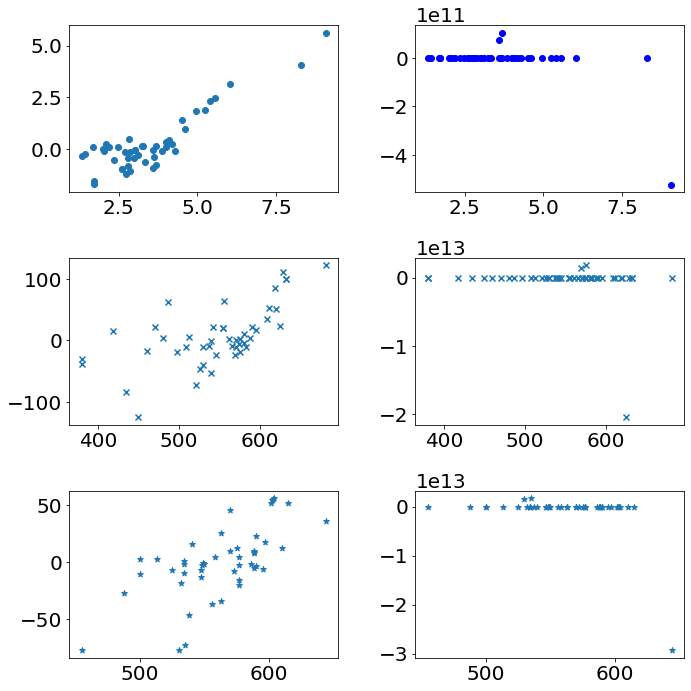

In [15]:
# Plots the residual plots
fig, axes = plt.subplots(figsize = (10,10), nrows = 3, ncols =2)

axes[0,0].scatter(y_test_d, y_test_d - y_predict_d, marker='o')
axes[0,1].scatter(y_test_d, y_test_d - y_poly_pred_d, marker='o', color='b')

axes[1,0].scatter(y_test_ab, y_test_ab - y_predict_ab, marker='x')
axes[1,1].scatter(y_test_ab, y_test_ab - y_poly_pred_ab, marker='x')

axes[2,0].scatter(y_test_pl, y_test_pl - y_predict_pl, marker='*')
axes[2,1].scatter(y_test_pl, y_test_pl - y_poly_pred_pl, marker='*')

plt.tight_layout()

### K-Cross Validation for each of the 3 linear models

In [16]:
# Sets the number of splits used in K-Cross Validation
kf = KFold(n_splits=5)

# K-Cross Validation for the 3 models
MSE_kf_d = []
MSE_kf_ab = []
MSE_kf_pl = []

for train_index, test_index in kf.split(X_total):
    # Splits the input data into testing and training sets
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    
    # Splits the output data based on how the input data set was split
    y_train_d, y_test_d = Y_total_d.iloc[train_index], Y_total_d.iloc[test_index]
    y_train_ab, y_test_ab = Y_total_ab.iloc[train_index], Y_total_ab.iloc[test_index]
    y_train_pl, y_test_pl = Y_total_pl.iloc[train_index], Y_total_pl.iloc[test_index]
    
    # Trains the 3 different models with the training dataset
    reg_d = linear_model.LinearRegression().fit(X_train, y_train_d)
    reg_ab = linear_model.LinearRegression().fit(X_train, y_train_ab)
    reg_pl = linear_model.LinearRegression().fit(X_train, y_train_pl)
    
    # Predicts the output for the testing dataset
    y_predict_d = reg_d.predict(X_test)
    y_predict_ab = reg_ab.predict(X_test)
    y_predict_pl = reg_pl.predict(X_test)
    MSE_kf_d.append(mean_squared_error(y_test_d, y_predict_d))
    MSE_kf_ab.append(mean_squared_error(y_test_ab, y_predict_ab))
    MSE_kf_pl.append(mean_squared_error(y_test_pl, y_predict_pl))


In [ ]:
plt.figure()
plt.plot(MSE_kf_d,'*', color='blue', label='diameter')
plt.plot(MSE_kf_ab,'o', color='green', label='ABS max')
plt.plot(MSE_kf_pl,'x', color='red', label='PL max')
plt.xlabel('Test set k-fold')
plt.ylabel('MSE')
plt.show()

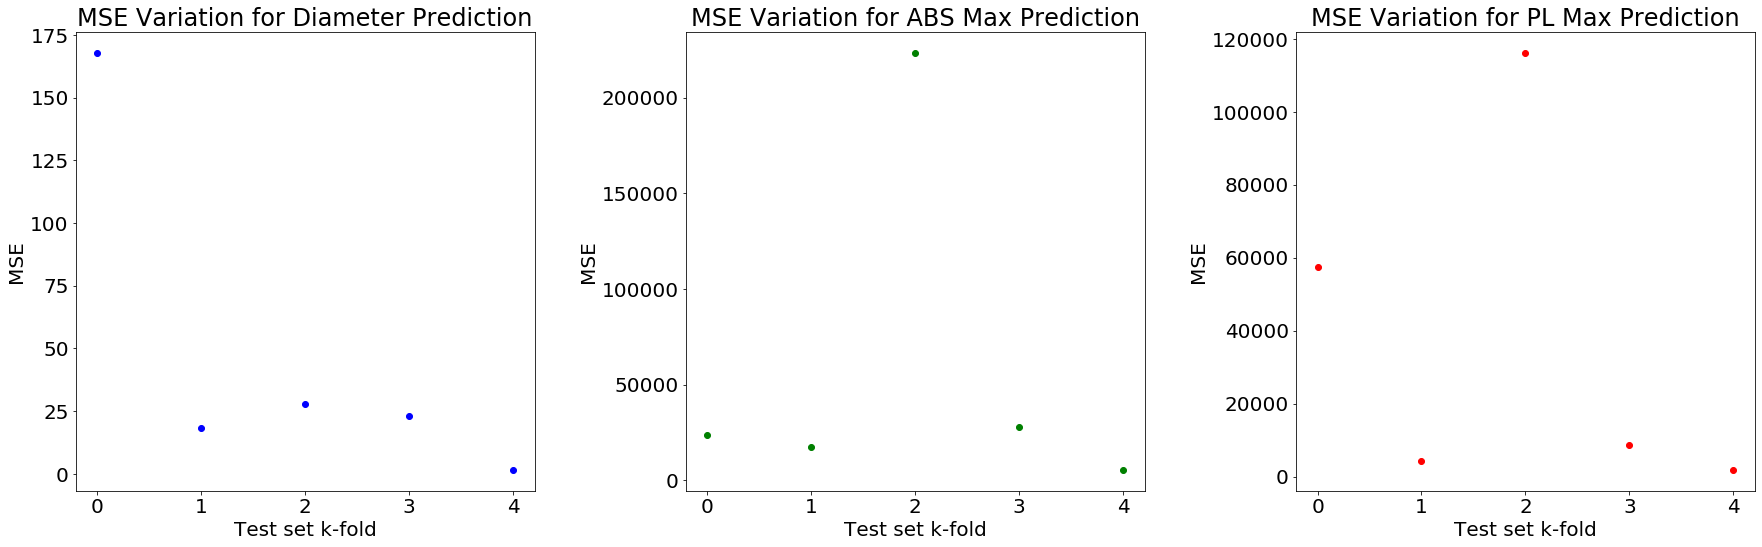

In [21]:
# Plot graphs of the predicted vs actual for each case
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(figsize = (25,8), nrows = 1, ncols =3)

axes[0].scatter([0, 1, 2, 3, 4], MSE_kf_d, color='blue', label='diameter')
axes[0].set_xlabel('Test set k-fold')
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE Variation for Diameter Prediction')

axes[1].scatter([0, 1, 2, 3, 4], MSE_kf_ab, color='green', label='diameter')
axes[1].set_xlabel('Test set k-fold')
axes[1].set_ylabel('MSE')
axes[1].set_title('MSE Variation for ABS Max Prediction')

axes[2].scatter([0, 1, 2, 3, 4], MSE_kf_pl, color='red', label='diameter')
axes[2].set_xlabel('Test set k-fold')
axes[2].set_ylabel('MSE')
axes[2].set_title('MSE Variation for PL Max Prediction')

plt.tight_layout()

In [26]:
# Calculates the mean of the MSE across 5 test/train datasets
CV_mean_5fold_MSE_d = 1/5. * np.sum(MSE_kf_d)
CV_mean_5fold_MSE_ab = 1/5. * np.sum(MSE_kf_ab)
CV_mean_5fold_MSE_pl = 1/5. * np.sum(MSE_kf_pl)

print("Mean test MSE for diameter prediction using 5-fold CV ", round((CV_mean_5fold_MSE_d),2))
print("Mean test MSE for ABS Max prediction using 5-fold CV ", round((CV_mean_5fold_MSE_ab),2))
print("Mean test MSE for PL Max prediction using 5-fold CV ", round((CV_mean_5fold_MSE_pl), 2))

Mean test MSE for diameter prediction using 5-fold CV  47.72
Mean test MSE for ABS Max prediction using 5-fold CV  59542.9
Mean test MSE for PL Max prediction using 5-fold CV  37640.29
